# SUPPORT VECTOR MACHINES

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# load and visualize data

In [45]:
# You will have X, y in your environment
data=loadmat("ex6data1.mat")

In [46]:
X = data["X"]
y = data["y"]

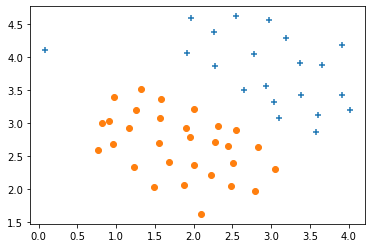

In [47]:
pos = (y==1)
neg = (y==0)
plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")

### Linear Support Vector Machine

In [48]:
svc = SVC(C = 1, kernel="linear")
svc.fit(X,y.ravel())

SVC(C=1, kernel='linear')

In [49]:
def getDecisionBoundary(fitted_model):
    teta_0 = fitted_model.intercept_
    tetas = []
    for i in range(fitted_model.coef_.shape[1]):
        teta = fitted_model.coef_[0][i]
        tetas.append(teta)
    return np.hstack((teta_0,tetas))    

In [50]:
theta = getDecisionBoundary(svc)

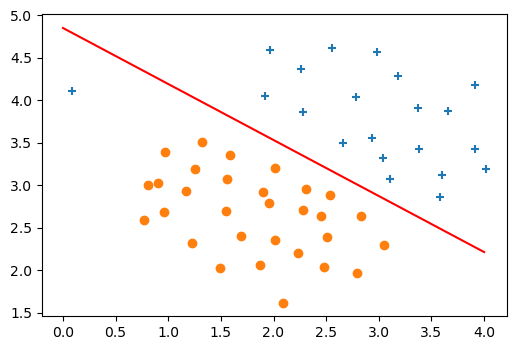

In [51]:
r = np.array(range(-0,5))
y_boundary = - (theta[0] + (theta[1]*r))/theta[2]
plt.figure(dpi=100)
plt.plot(r, y_boundary, c="r")
plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")

### SVC with different C 

In [52]:
def decisionBoundaryPlot(C):
    svc = SVC(C = C, kernel="linear")
    svc.fit(X,y.ravel())
    theta = getDecisionBoundary(svc)
    r = np.array(range(-0,5))
    y_boundary = - (theta[0] + (theta[1]*r))/theta[2]
    plt.figure(dpi=100)
    plt.plot(r, y_boundary, c="r")
    plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
    plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")
    plt.title("Decision Boundary with C = {}".format(C))

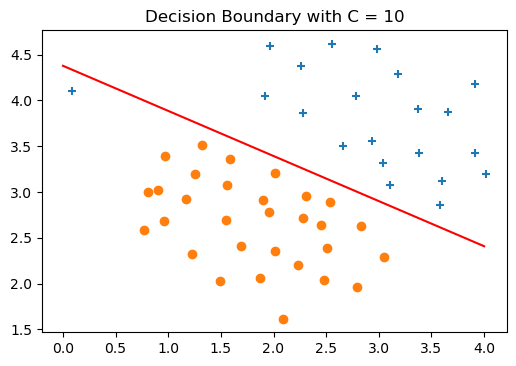

In [53]:
decisionBoundaryPlot(10)

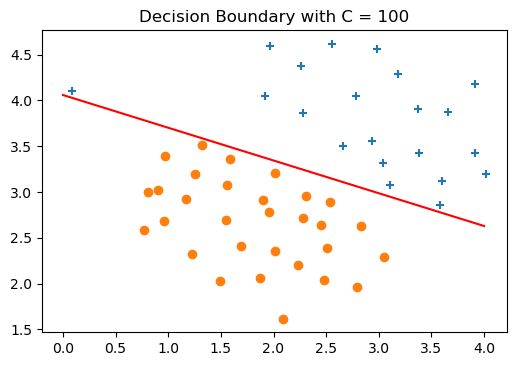

In [54]:
decisionBoundaryPlot(100)

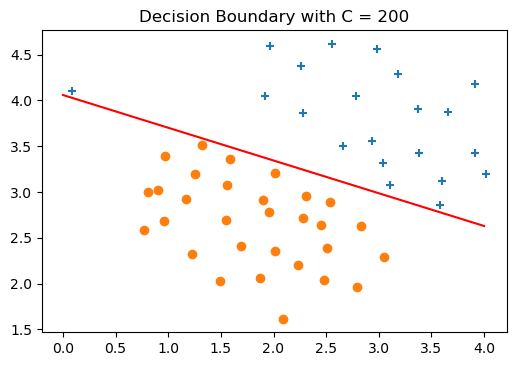

In [55]:
decisionBoundaryPlot(200)

## Gaussian Kernel

<img src="svm_gaussian_kernel.PNG" width="500" height="300">

In [56]:
def sim(x1, x2, sigma):
    sim = np.exp(-np.sum((x1 - x2)**2) / (2*(sigma**2)))
    return sim

In [57]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

In [58]:
print("Gaussian kernel similarity between x1 and x2 with sigma: {}".format(sim(x1, x2, sigma)))


Gaussian kernel similarity between x1 and x2 with sigma: 0.32465246735834974


## Example Dataset 2

In [59]:
data=loadmat("ex6data2.mat")

In [60]:
X = data["X"]
y = data["y"]

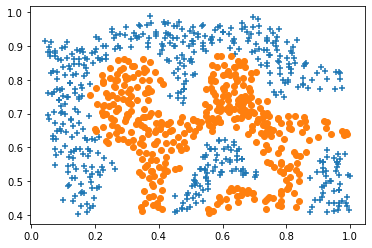

In [61]:
pos = (y==1)
neg = (y==0)
plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")

### Non-Linear Support Vector Machine (rbf kernel)

In [62]:
svc = SVC(C = 100, kernel="rbf", gamma=10)
svc.fit(X,y.ravel())

SVC(C=100, gamma=10)

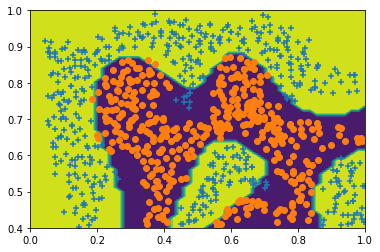

In [63]:
theta0_vals=np.linspace(0,1,50)
theta1_vals=np.linspace(0.4,1,50)
xx1, xx2 = np.meshgrid(theta0_vals,theta1_vals)
Z = svc.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(theta0_vals, theta1_vals, Z)
plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")
plt.xlim(theta0_vals.min(), theta0_vals.max())
plt.ylim(theta1_vals.min(), theta1_vals.max())
plt.show()

### Example dataset 3

In [64]:
data=loadmat("ex6data3.mat")

In [65]:
X = data["X"]
y = data["y"]
Xval = data["Xval"]
yval = data["yval"]

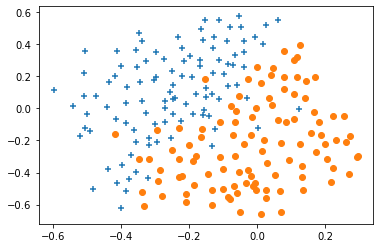

In [66]:
pos = (y==1)
neg = (y==0)
plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")

### we will implement brut force to evaluate all different parameters

In [67]:
results = []
for C in  ([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]):
    for gamma in ([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]):
        svc = SVC(C=C, gamma=gamma, kernel="rbf")
        svc.fit(X,y.ravel())
        predict_val = svc.predict(Xval)
        accuracy_val = accuracy_score(yval,predict_val)
        results.append([C, gamma, accuracy_val])

In [68]:
results_val = pd.DataFrame(results,columns=["C","gamma","accuracy"])

In [69]:
results_val=results_val.sort_values(by="accuracy",ascending=False,ignore_index=True)

In [70]:
print("Best model C: {}  gamma: {} accuracy: {}".format(results_val["C"][0],
                                                        results_val["gamma"][0],results_val["accuracy"][0]))

Best model C: 30.0  gamma: 10.0 accuracy: 0.965


In [71]:
svc = SVC(C=30, gamma=10, kernel="rbf") # fit best model
svc.fit(X,y.ravel())

SVC(C=30, gamma=10)

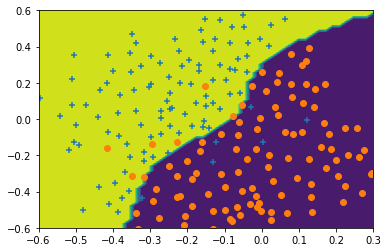

In [72]:
theta0_vals=np.linspace(-0.6,0.3,50)
theta1_vals=np.linspace(-0.6,0.6,50)
xx1, xx2 = np.meshgrid(theta0_vals,theta1_vals)
Z = svc.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(theta0_vals, theta1_vals, Z)
plt.scatter(X[:,0].reshape(-1,1)[pos],X[:,1].reshape(-1,1)[pos],marker ="+")
plt.scatter(X[:,0].reshape(-1,1)[neg],X[:,1].reshape(-1,1)[neg],marker ="o")
plt.xlim(theta0_vals.min(), theta0_vals.max())
plt.ylim(theta1_vals.min(), theta1_vals.max())
plt.show()

# Spam Classification

### Preprocessing emails

In [73]:
data=loadmat("spamTrain.mat")

In [74]:
X = data["X"]
y = data["y"]

In [75]:
svc = SVC(C = 0.1, kernel="linear")

In [76]:
svc.fit(X,y.ravel())

SVC(C=0.1, kernel='linear')

In [77]:
p = svc.predict(X)
print("Training Accuracy : {}".format(np.sum(p.reshape(-1,1) == y.reshape(-1,1))/len(y)*100))

Training Accuracy : 99.825


In [78]:
data_test=loadmat("spamTest.mat")

In [79]:
Xtest = data_test["Xtest"]
ytest = data_test["ytest"]

In [80]:
t = svc.predict(Xtest)
print("Test Accuracy : {}".format(np.sum(t.reshape(-1,1) == ytest.reshape(-1,1))/len(ytest)*100))

Test Accuracy : 98.9
